<a href="https://colab.research.google.com/github/victorgil777/MEE/blob/main/PTSD_SEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install semopy

Resultados del modelo:
   lval  op rval    Estimate   Std. Err     z-value  p-value
0    SC   ~   AM    1.010836   0.018715    54.01126      0.0
1    SC   ~   SM   -0.896750   0.018537  -48.376094      0.0
2    V1   ~   SC    1.000000          -           -        -
3    V2   ~   SC    1.005821   0.005666  177.517309      0.0
4    V3   ~   SC    1.004850   0.006054  165.973091      0.0
5    V4   ~   AM    1.000000          -           -        -
6    V5   ~   AM    1.001502   0.009939  100.764304      0.0
7    V6   ~   AM    0.985156   0.009863    99.87965      0.0
8    V7   ~   SM    1.000000          -           -        -
9    V8   ~   SM    0.997854   0.009852  101.287009      0.0
10   V9   ~   SM    0.989220   0.009875  100.173001      0.0
11   SC  ~~   AM   14.289647   0.140432  101.754766      0.0
12   SC  ~~   SM  -15.087622   0.145689 -103.560498      0.0
13   SC  ~~   SC   10.240990   0.768685   13.322732      0.0
14   AM  ~~   AM  140.418402   11.61806   12.086218      0.0
1

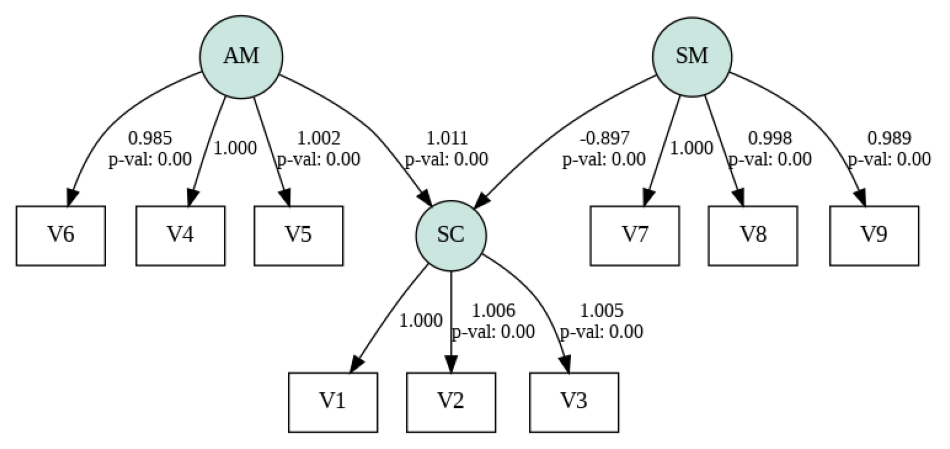

Índices de ajuste del modelo:
       DoF  DoF Baseline       chi2  chi2 p-value  chi2 Baseline       CFI  \
Value   22            36  17.963719      0.708137    8375.183882  1.000484   

            GFI     AGFI       NFI       TLI  RMSEA        AIC         BIC  \
Value  0.997855  0.99649  0.997855  1.000792      0  45.880242  131.067239   

         LogLik  
Value  0.059879  


In [ ]:
import pandas as pd
import semopy
import matplotlib.pyplot as plt
import os

# Verificar que el archivo de datos existe
file_path = 'URABENOS.xlsx'
if not os.path.exists(file_path):
    raise FileNotFoundError(f"El archivo {file_path} no se encuentra en el directorio actual.")

# Cargar datos
data = pd.read_excel(file_path)

# Definir el modelo SEM
model_spec = """
# Modelo de medición
SC =~ V1 + V2 + V3
AM =~ V4 + V5 + V6
SM =~ V7 + V8 + V9

# Structural model
SC ~ AM + SM

# Correlaciones
SC ~~ AM + SM

"""

# Crear y ajustar el modelo
model = semopy.Model(model_spec)
try:
    model.fit(data)
except Exception as e:
    print(f"Error al ajustar el modelo: {e}")
    exit()

# Inspeccionar resultados
print("Resultados del modelo:")
print(model.inspect())

# Generar diagrama del modelo SEM
output_img = 'BASE.png'
semopy.semplot(model, output_img)
print(f"Diagrama del modelo SEM guardado como '{output_img}'.")

# Mostrar la imagen con un tamaño adecuado
if os.path.exists(output_img):
    img = plt.imread(output_img)
    plt.figure(figsize=(12, 12))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
else:
    print("No se encontró la imagen generada del modelo.")

# Mostrar índices de ajuste
try:
    stats = semopy.calc_stats(model)
    print("Índices de ajuste del modelo:")
    print(stats)
except Exception as e:
    print(f"Error al calcular los índices de ajuste: {e}")